In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

os.environ['DATA_DIR'] = '/home/arco/Downloads/Master AI/CEConvDL2'
os.environ['WANDB_DIR'] = '/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/site-packages/'
os.environ['OUT_DIR'] = '/home/arco/Downloads/Master AI/CEConv/output'



In [ ]:
!python -m experiments.color_mnist.colormnist_longtailed

for i in range(1, 11):
    !python -m experiments.color_mnist.train_longtailed --rotations 1 --planes 20 --grayscale --seed {i}
    !python -m experiments.color_mnist.train_longtailed --rotations 3 --planes 17 --separable --seed {i}

In [2]:
import os

os.environ['DATA_DIR'] = '/home/arco/Downloads/Master AI/CEConvDL2'
os.environ['WANDB_DIR'] = '/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/site-packages/'
os.environ['OUT_DIR'] = '/home/arco/Downloads/Master AI/CEConv/output'

!python -m experiments.color_mnist.colormnist_longtailed

for i in range(1, 11):
    !python -m experiments.color_mnist.train_longtailed --rotations 1 --planes 20 --seed {i}

Generated ColorMNIST - longtailed dataset at /home/arco/Downloads/Master AI/CEConvDL2/colormnist_longtailed
Global seed set to 1
train: (tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), tensor([ 26, 105, 103,  77,   1,  44,   6,  17,  38,   1,   2,  50,  67,  88,
         65,   1,   1,  58,   2,   2,  90, 127,  22,   1,  63,  15,  33,  84,
         12,  15]))
test: (tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), tensor([250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250]))
Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [2, 30]                   --
├─Conv2d: 1-1                            [2, 20, 26, 26]           560
├─BatchNorm2

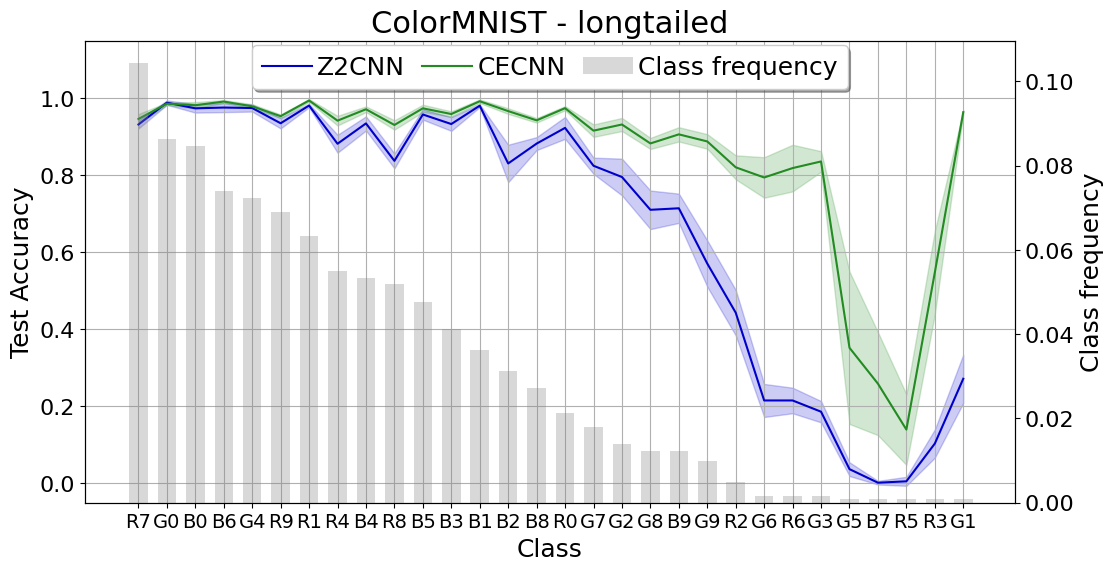

In [4]:
from utils import plot_figure_2
plot_figure_2("/home/arco/Downloads/Master AI/CEConvDL2")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 97/97 [02:12<00:00,  1.37s/it]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 97/97 [02:11<00:00,  1.36s/it]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 97/97 [07:11<00:00,  4.45s/it]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 97/97 [07:06<00:00,  4.40s/it]


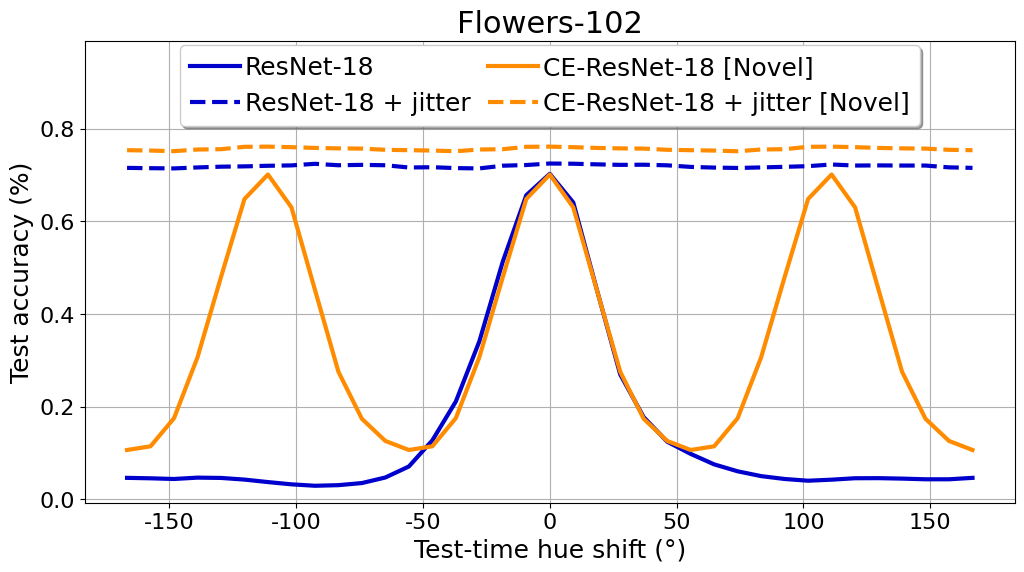

In [28]:
from utils import plot_figure_9
plot_figure_9()